In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [67]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path ='gdrive/My Drive/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [69]:
df1=pd.read_csv('gdrive/My Drive/DATA2021.csv')
df2=pd.read_csv('gdrive/My Drive/DATA2022.csv')
df3=pd.read_csv('gdrive/My Drive/DATA2023.csv')



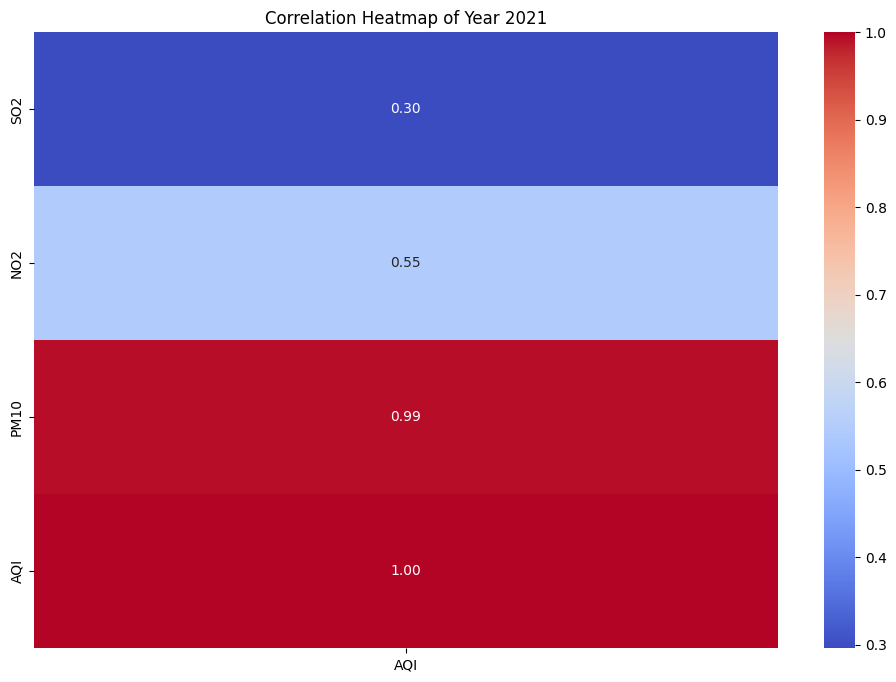

In [70]:

import seaborn as sns
numeric_df = df1.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()['AQI']
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Year 2021')
plt.show()

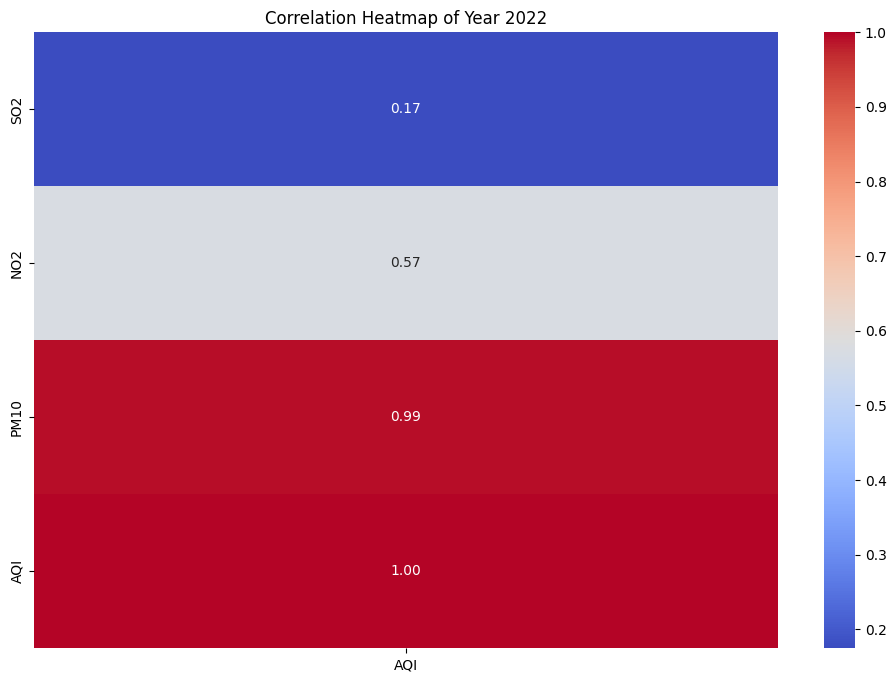

In [71]:

import seaborn as sns
numeric_df = df2.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()['AQI']
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Year 2022')
plt.show()

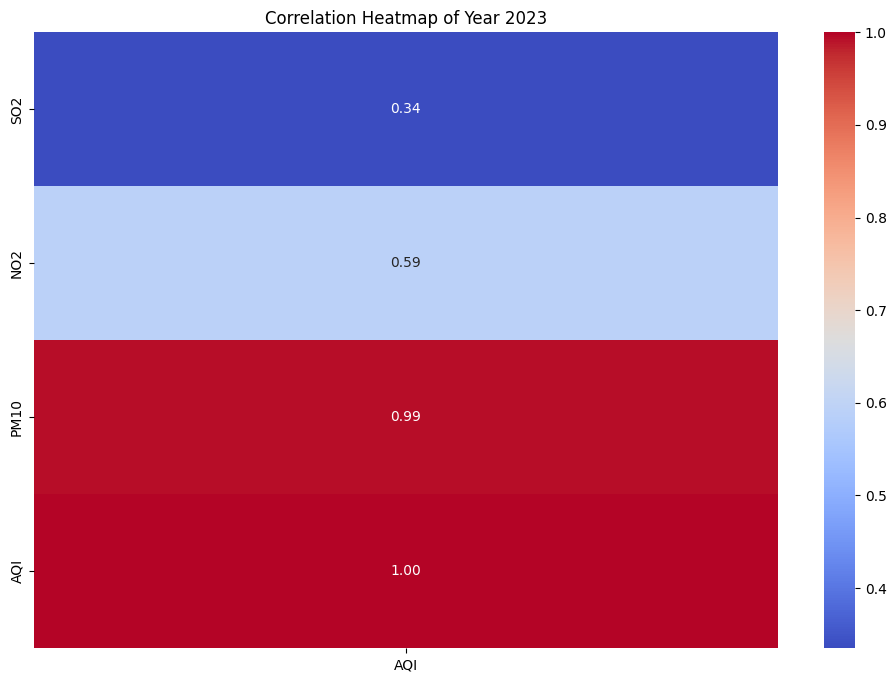

In [72]:

import seaborn as sns
numeric_df = df3.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()['AQI']
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Year 2023')
plt.show()

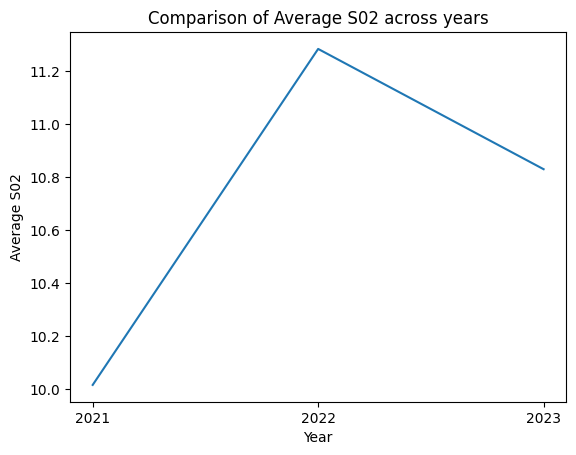

In [73]:


s02_2021 = df1['SO2'].mean()
s02_2022 = df2['SO2'].mean()
s02_2023 = df3['SO2'].mean()

years = ['2021', '2022', '2023']
s02_values = [s02_2021, s02_2022, s02_2023]

plt.plot(years, s02_values)
plt.xlabel('Year')
plt.ylabel('Average S02')
plt.title('Comparison of Average S02 across years')
plt.show()


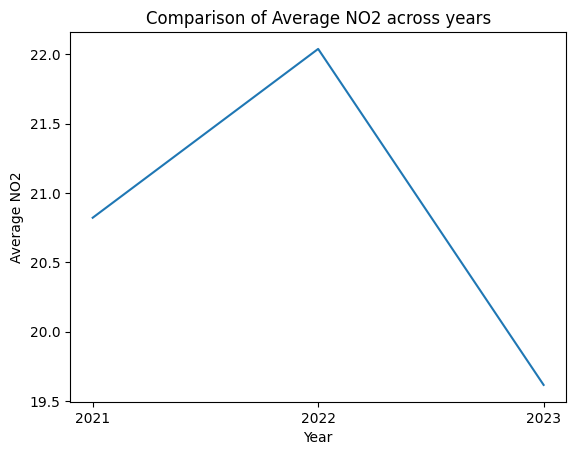

In [74]:

no2_2021 = df1['NO2'].mean()
no2_2022 = df2['NO2'].mean()
no2_2023 = df3['NO2'].mean()

years = ['2021', '2022', '2023']
no2_values = [no2_2021, no2_2022, no2_2023]

plt.plot(years, no2_values)
plt.xlabel('Year')
plt.ylabel('Average NO2')
plt.title('Comparison of Average NO2 across years')
plt.show()


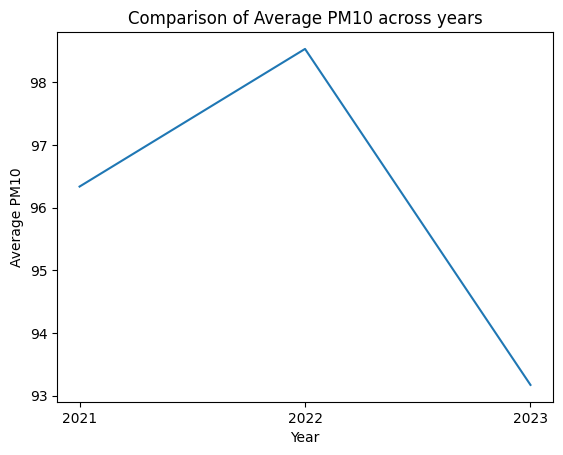

In [75]:

pm10_2021 = df1['PM10'].mean()
pm10_2022 = df2['PM10'].mean()
pm10_2023 = df3['PM10'].mean()

years = ['2021', '2022', '2023']
pm10_values = [pm10_2021, pm10_2022, pm10_2023]

plt.plot(years, pm10_values)
plt.xlabel('Year')
plt.ylabel('Average PM10')
plt.title('Comparison of Average PM10 across years')
plt.show()


In [76]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
df = pd.concat([df1, df2, df3], ignore_index=True)
features = ['SO2', 'NO2', 'PM10']
target = 'AQI'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=77)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")



R-squared (R2): 0.9913226826921462


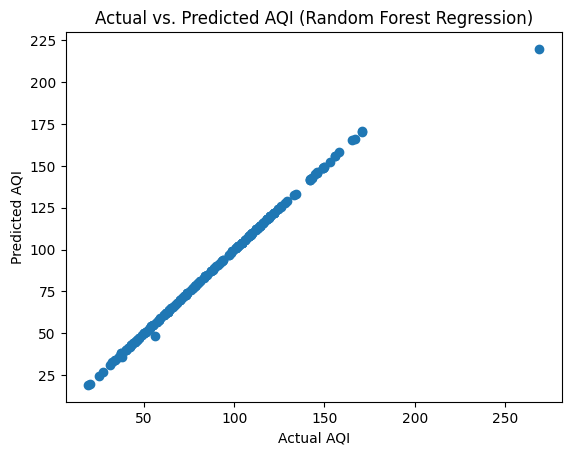

In [84]:


plt.scatter(y_test, y_pred)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs. Predicted AQI (Random Forest Regression)")
plt.show()
